### Ejemplo de procesar datos para generar un conjunto de imagenes

### Lectura de datos

Para este ejemplo se usa un conjunto de datos genericos con 40931 registros que contienen latitud longitud y la fecha en que se registro el suceso.

In [1]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# Lee el archivo CSV
df = pd.read_csv('dataEjemplo', index_col=0, parse_dates=["datetime"])

# Muestra el dataframe
df

CPU times: user 751 ms, sys: 1.11 s, total: 1.86 s
Wall time: 957 ms


,latitud,longitud,datetime
0,29.7836,-110.4264,2017-06-07 20:22:02
1,29.8918,-110.4976,2017-06-07 20:55:58
2,29.9483,-110.4792,2017-06-07 20:58:15
3,29.8345,-110.4746,2017-06-07 21:00:40
4,29.8838,-110.5383,2017-06-07 21:03:45
...,...,...,...
40926,29.7011,-110.3363,2017-09-16 00:22:13
40927,29.6690,-110.4911,2017-09-16 00:22:26
40928,29.6890,-110.4051,2017-09-16 00:23:08
40929,29.7356,-110.3660,2017-09-16 00:24:20


#### Se establece el area de estudio y la resolucion espacial.

Se utiliza la latitud y longitud para determinar el area de analisis

La resolucion espacial determina el tamaño que tendra cada lado del pixel, en este caso el area de estudio se dividira en zonas de 0.01x0.01.

Con la resolucion espacial se podra calcular la cantidad de zonas que tiene el area total, por lo que en este ejemplo resultaria de 40x40.

Por esta razon las matrices para generar las imagenes deberan de ser de 40x40



In [2]:
latF=30.055
latI=29.655

lonF=-110.315
lonI=-110.715

resEsp=0.01

print("\nDimension de las matrices.")
cuaPcolumna=math.ceil(round(latF-latI, 3)/resEsp)
print(cuaPcolumna)
cuaPrenglon=math.ceil(round(lonF-lonI, 3)/resEsp)
print(cuaPrenglon)


Dimension de las matrices.
40
40


### Filtrado de datos

Se filtran los todos los datos para solo quedarse con los que esten dentro del area de estudio, pero en este ejemplo todos estan dentro de la zona.

En este caso es una zona cuadrada, en caso de no ser una zona cuadrada se necesita el uso de una libreria que permita calcular si una coordenada esta dentro del poligono que se quiera estudiar.

In [3]:
df=df[(df.latitud>=latI) & (df.latitud<=latF) & (df.longitud<=lonF) & (df.longitud>=lonI)]
df

,latitud,longitud,datetime
0,29.7836,-110.4264,2017-06-07 20:22:02
1,29.8918,-110.4976,2017-06-07 20:55:58
2,29.9483,-110.4792,2017-06-07 20:58:15
3,29.8345,-110.4746,2017-06-07 21:00:40
4,29.8838,-110.5383,2017-06-07 21:03:45
...,...,...,...
40926,29.7011,-110.3363,2017-09-16 00:22:13
40927,29.6690,-110.4911,2017-09-16 00:22:26
40928,29.6890,-110.4051,2017-09-16 00:23:08
40929,29.7356,-110.3660,2017-09-16 00:24:20


### Intervalo de fechas

En este caso se utiliza el primer y ultimo registro como fecha inicial y fecha final, en este caso como se generara una imagen por dia, solo se tomara en cuenta la fecha sin considerar la hora.

In [4]:
fI=df.datetime[0].replace(hour=0,  minute=0, second=0,)
fF=df.datetime[len(df)-1].replace(hour=0,  minute=0, second=0,)
print(fI)
print(fF)

2017-06-07 00:00:00
2017-09-16 00:00:00


### Generando las matrices

En esta parte se hace un ciclo entre la fecha inicial y la fecha final revisando los datos que se obtienen cada dia, con los datos de cada dia se registra la actividad de ese dia en la matriz.

Al final se obtendra una lista con 102 matrices que representa la cantidad de dias que contienen estos datos.

In [5]:
%%time
matrices=[]
i=0
fecha=fI
fechaFinal=fF+timedelta(days = 1)

while fecha<fechaFinal:
    print(fecha)
    print(fechaFinal)
    a=df[(df.datetime>=fecha) & (df.datetime<fecha+timedelta(days = 1))]
    m=np.zeros((cuaPcolumna, cuaPrenglon))
    print("datos: "+str(len(a)))
    for item in a.values:
        latitud=item[0]
        longitud=item[1]
        y = int((latitud-latI)/resEsp)
        x = int((longitud-lonI)/resEsp)
        m[y][x]=1
        
    fecha=fecha+timedelta(days = 1)
    matrices.append(m)

2017-06-07 00:00:00
2017-09-17 00:00:00
datos: 5
2017-06-08 00:00:00
2017-09-17 00:00:00
datos: 7
2017-06-09 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-10 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-11 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-12 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-13 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-14 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-15 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-16 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-17 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-18 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-19 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-20 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-21 00:00:00
2017-09-17 00:00:00
datos: 36
2017-06-22 00:00:00
2017-09-17 00:00:00
datos: 191
2017-06-23 00:00:00
2017-09-17 00:00:00
datos: 8
2017-06-24 00:00:00
2017-09-17 00:00:00
datos: 0
2017-06-25 00:00:00
2017-09-17 00:00:00
datos: 104
2017-06-26 00:00:00
2017-09-17 00:00:00
datos: 281
2017-06-27 00

In [6]:
len(matrices)

102

### Visualizacion

Se visualizan las 102 imagenes que se generaron.

valores:5.0


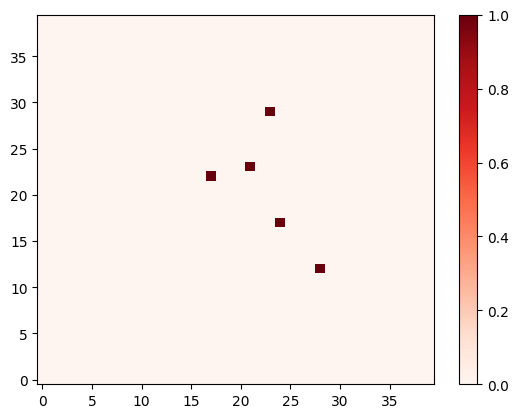

valores:7.0


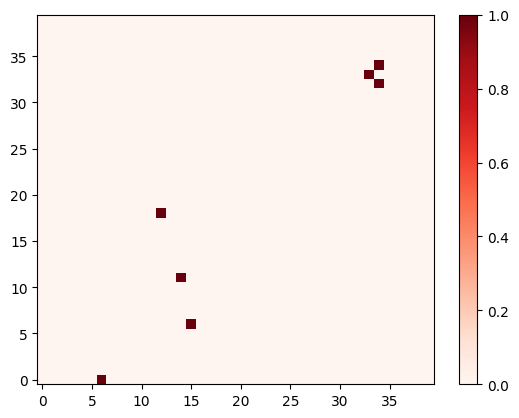

valores:0.0


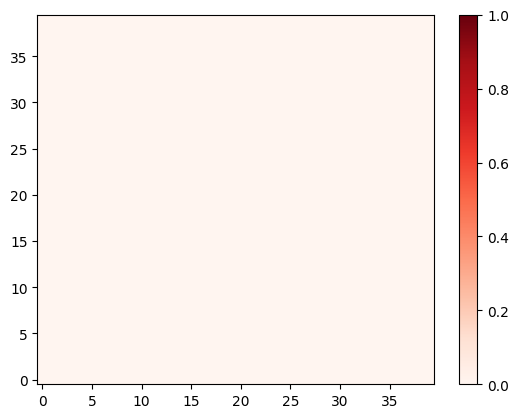

valores:0.0


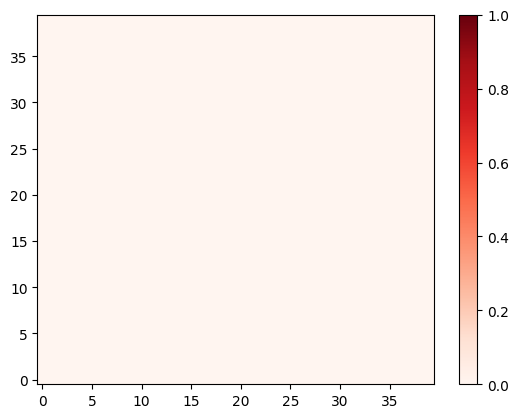

valores:0.0


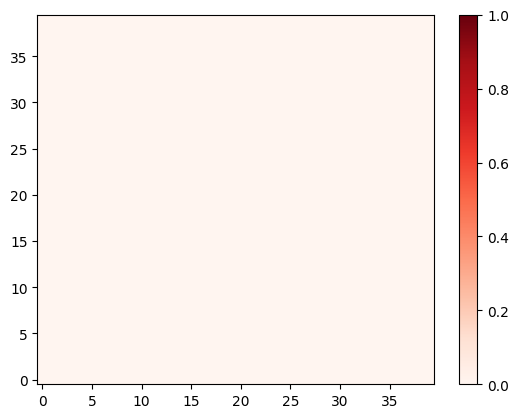

valores:0.0


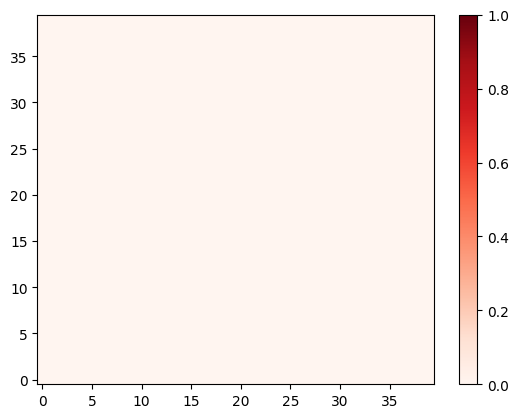

valores:0.0


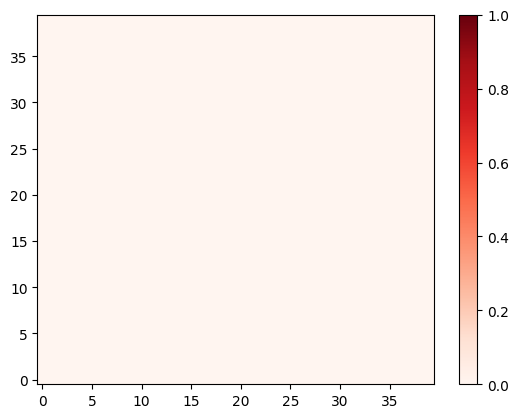

valores:0.0


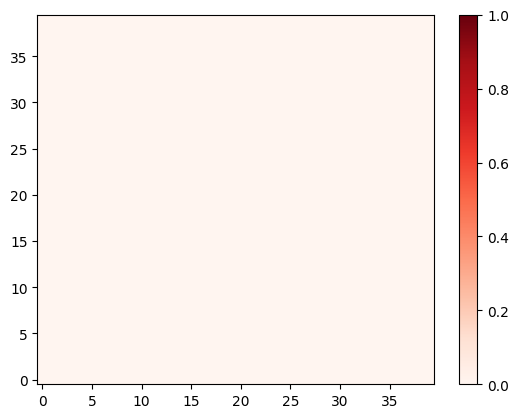

valores:0.0


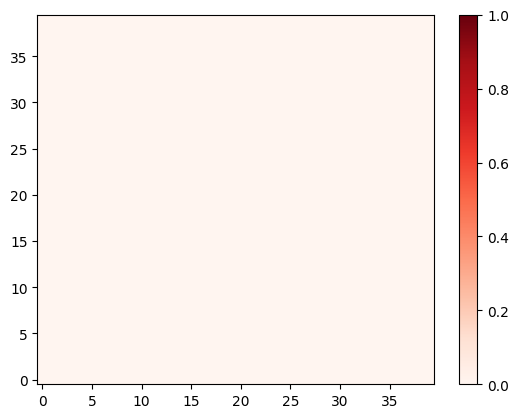

valores:0.0


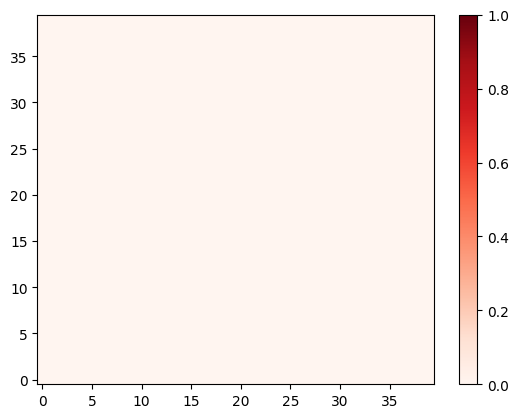

valores:0.0


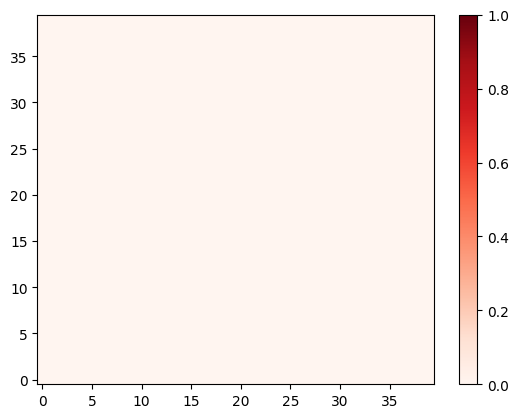

valores:0.0


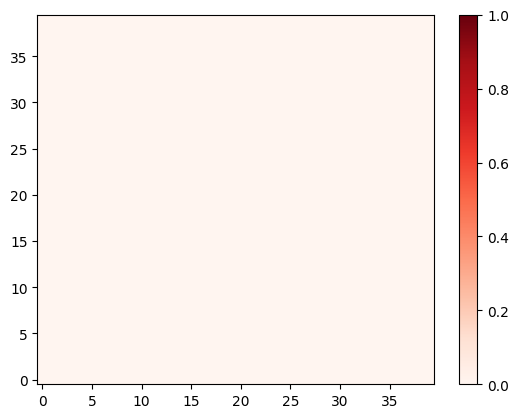

valores:0.0


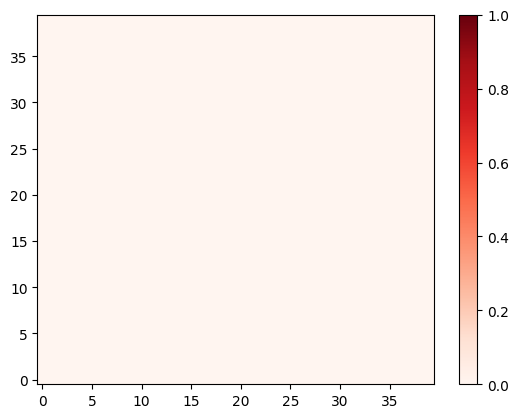

valores:0.0


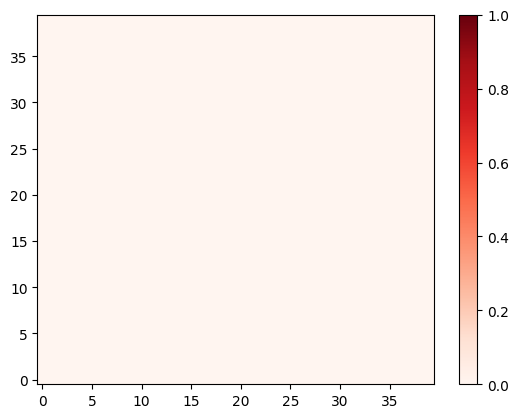

valores:32.0


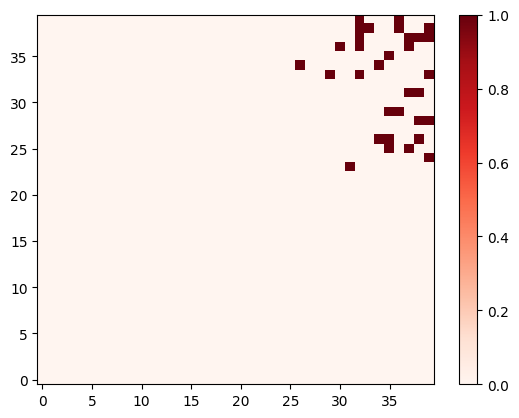

valores:134.0


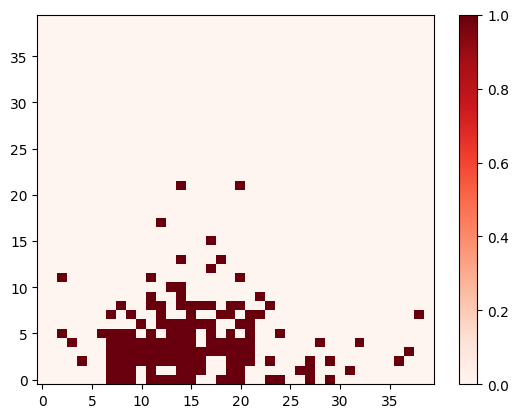

valores:8.0


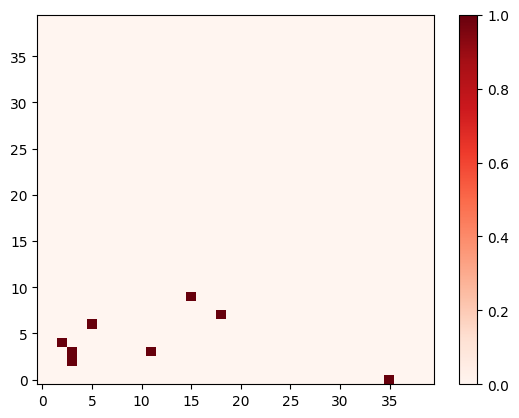

valores:0.0


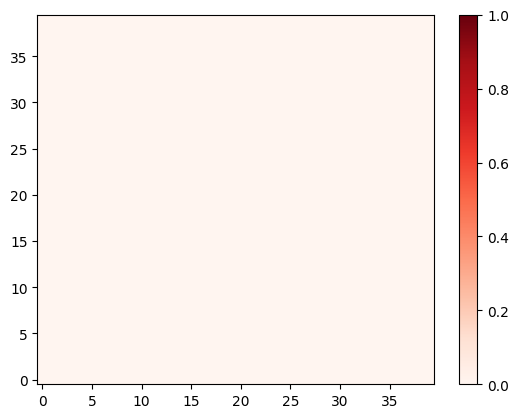

valores:99.0


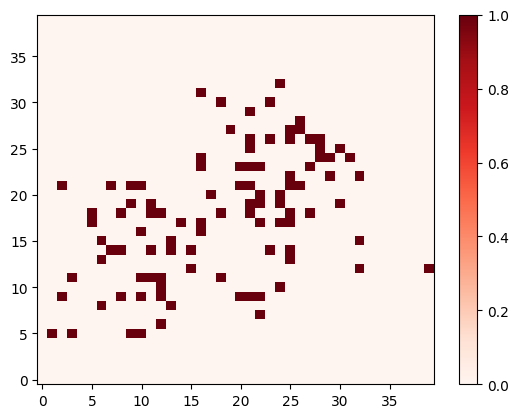

valores:227.0


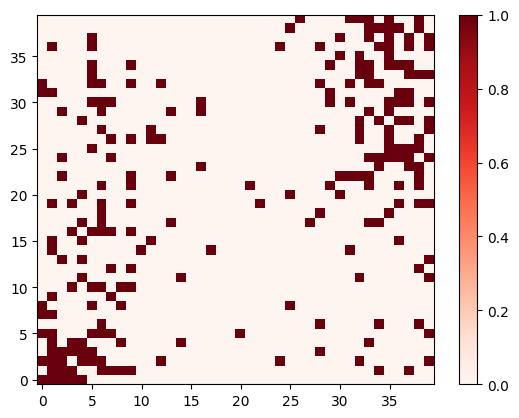

valores:5.0


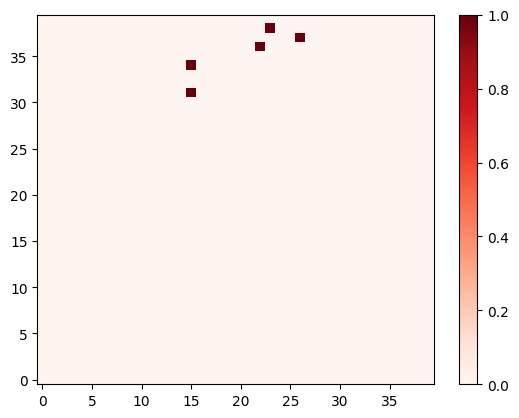

valores:179.0


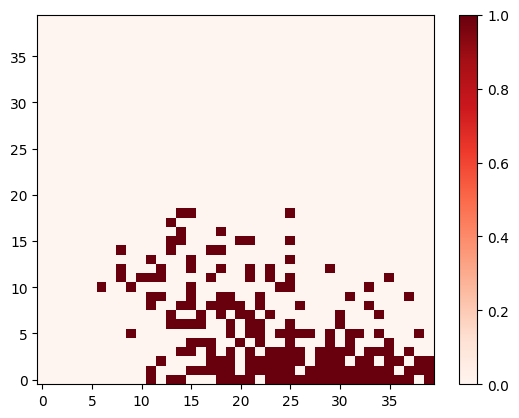

valores:0.0


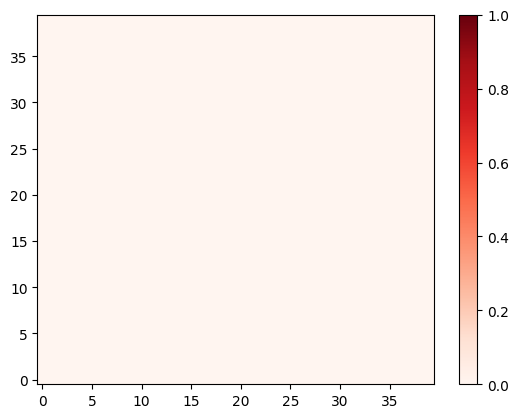

valores:0.0


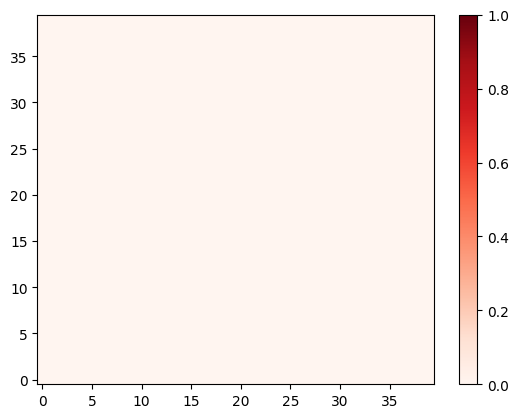

valores:0.0


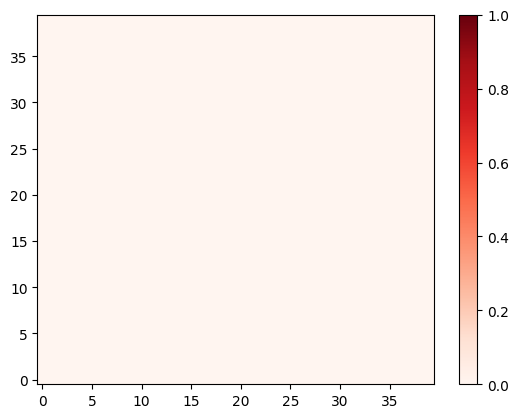

valores:8.0


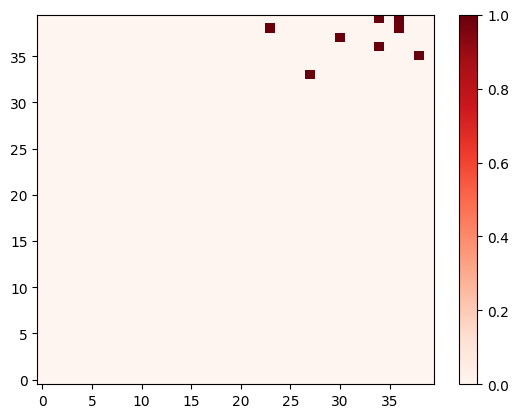

valores:1017.0


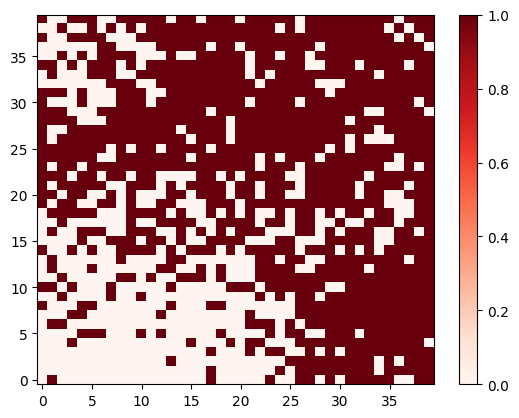

valores:2.0


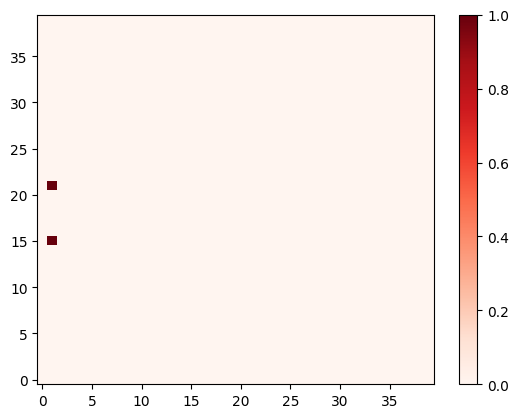

valores:144.0


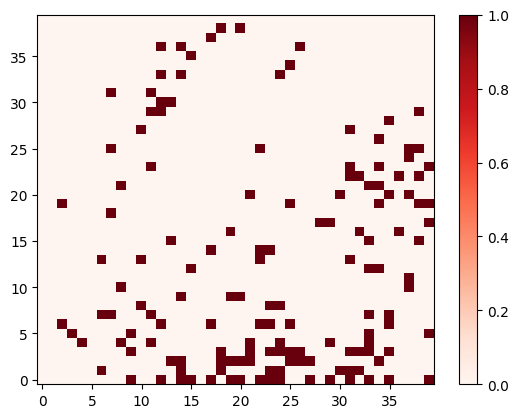

valores:744.0


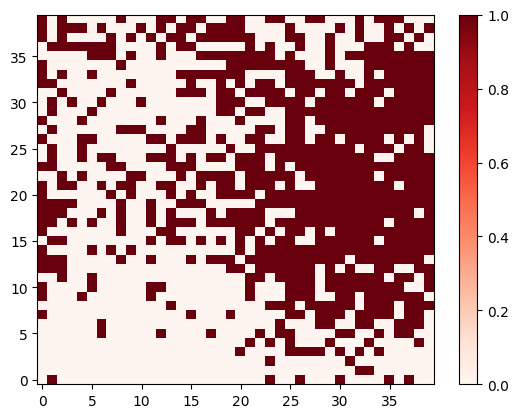

valores:0.0


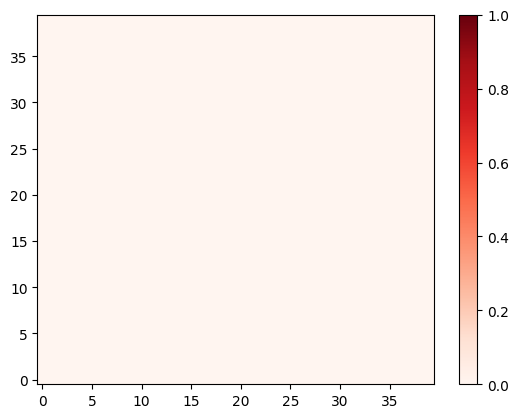

valores:0.0


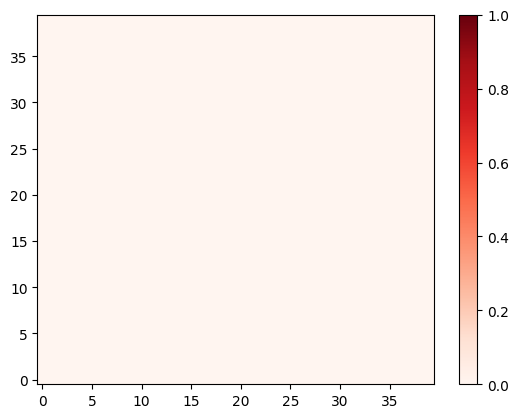

valores:40.0


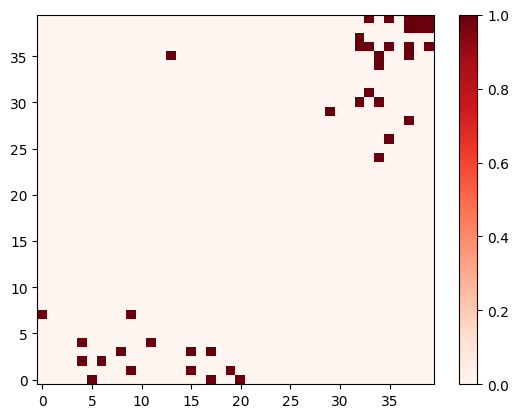

valores:103.0


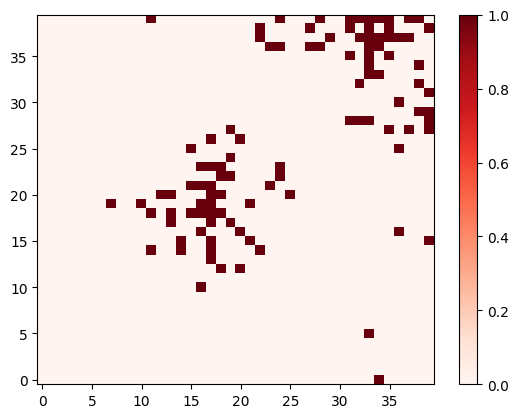

valores:355.0


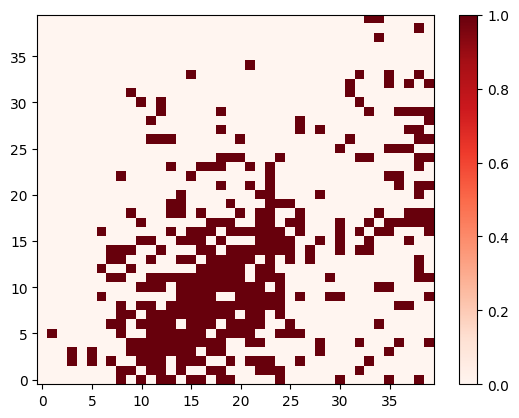

valores:678.0


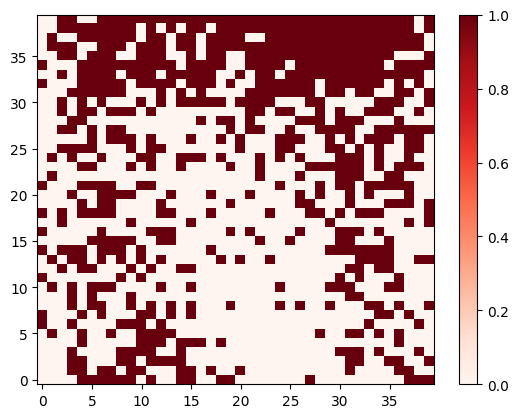

valores:21.0


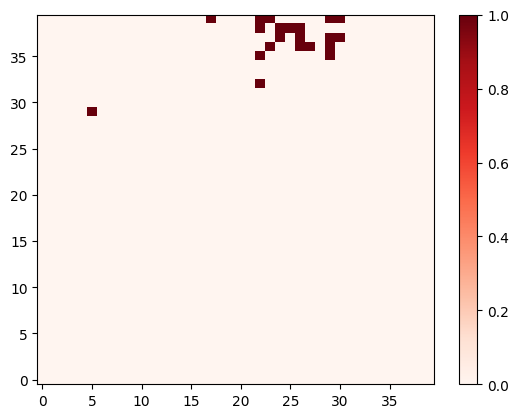

valores:2.0


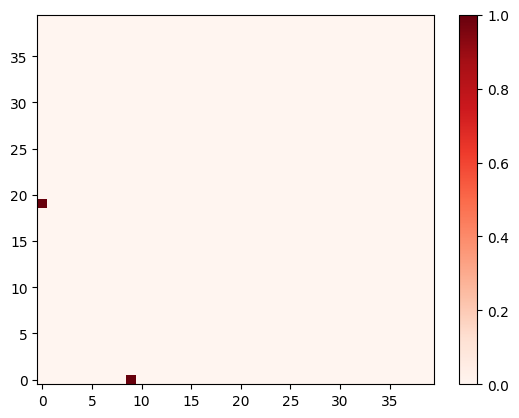

valores:635.0


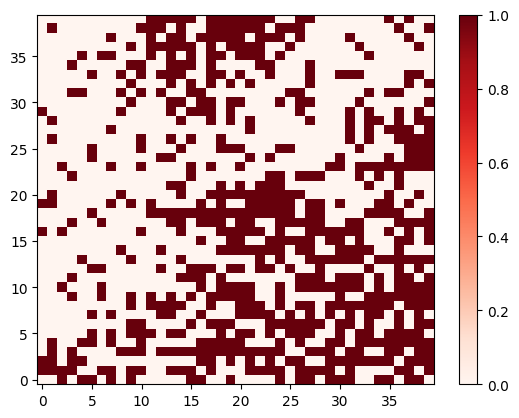

valores:96.0


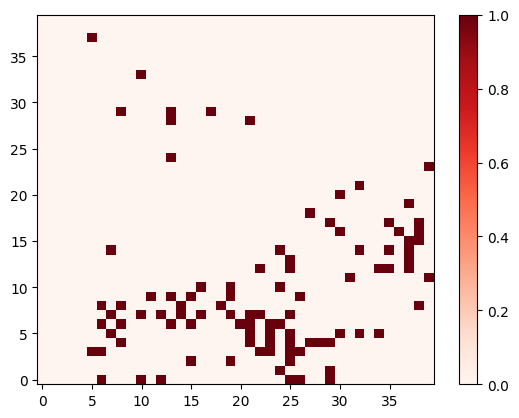

valores:34.0


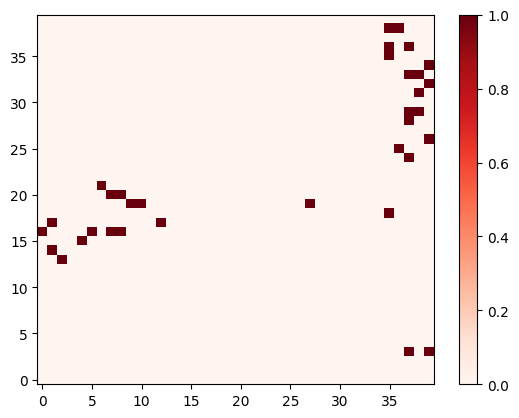

valores:6.0


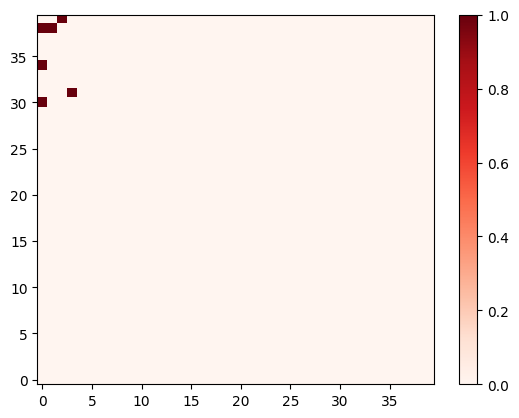

valores:126.0


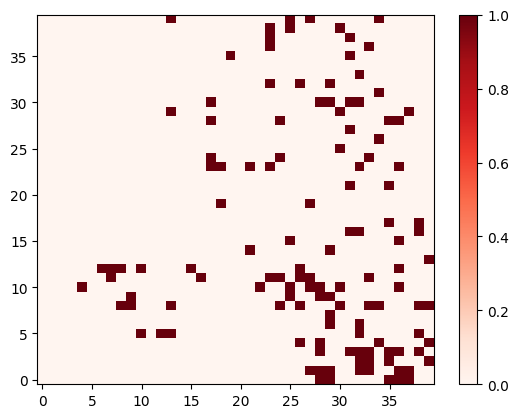

valores:172.0


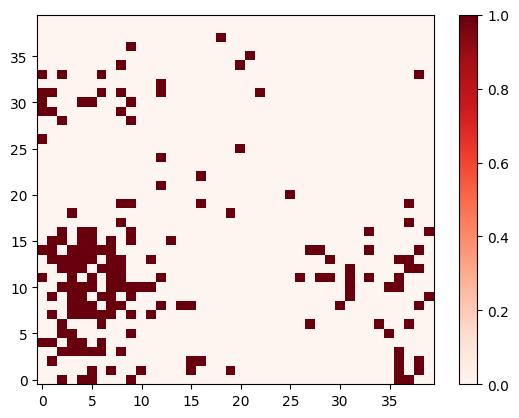

valores:118.0


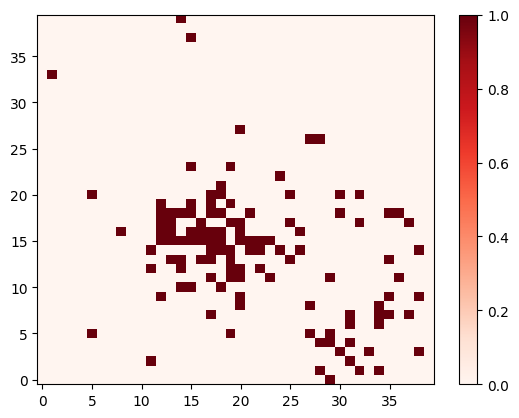

valores:92.0


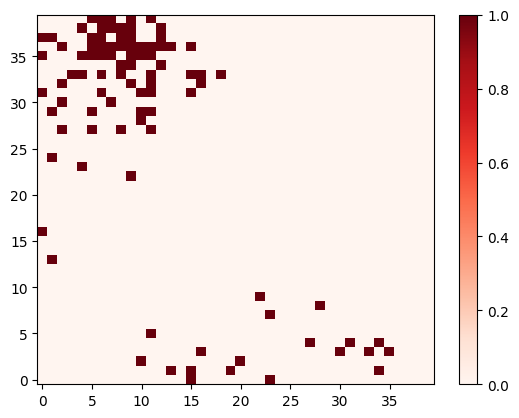

valores:0.0


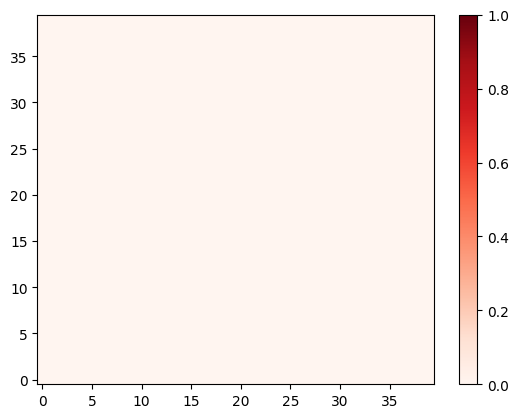

valores:0.0


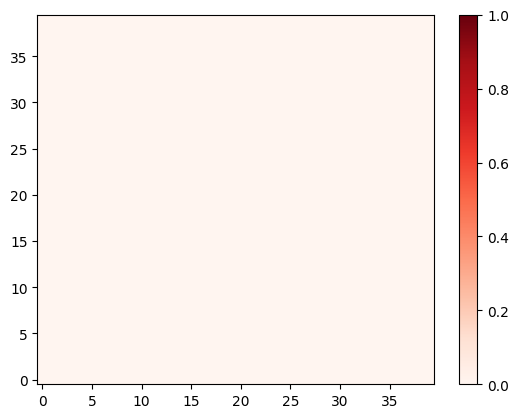

valores:0.0


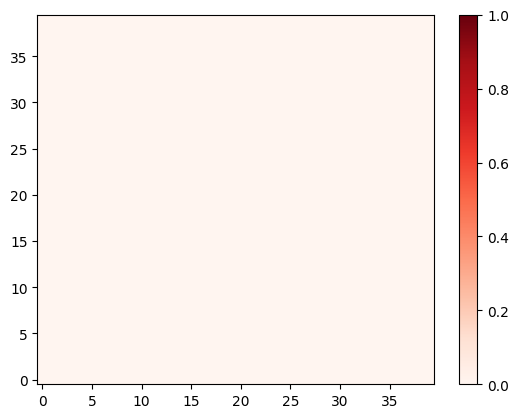

valores:223.0


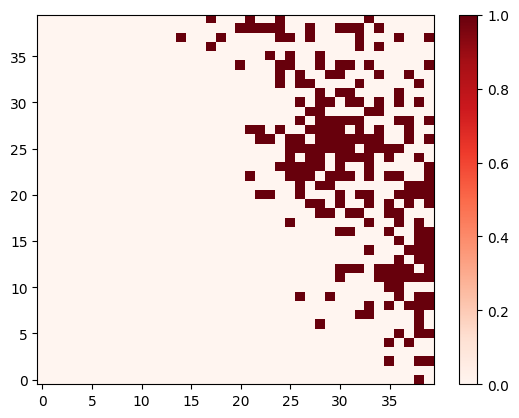

valores:31.0


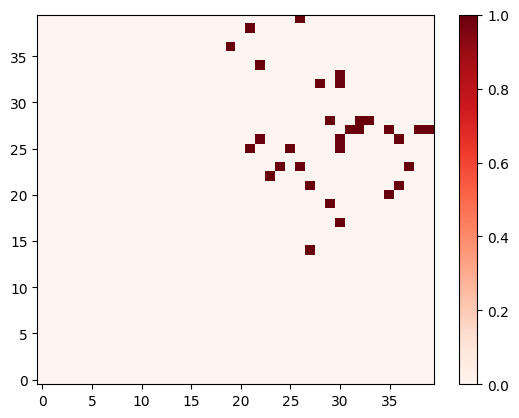

valores:1021.0


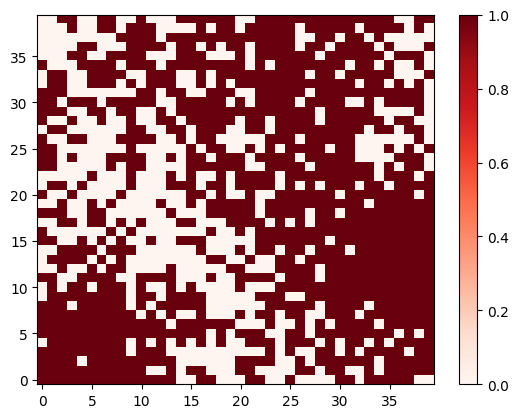

valores:459.0


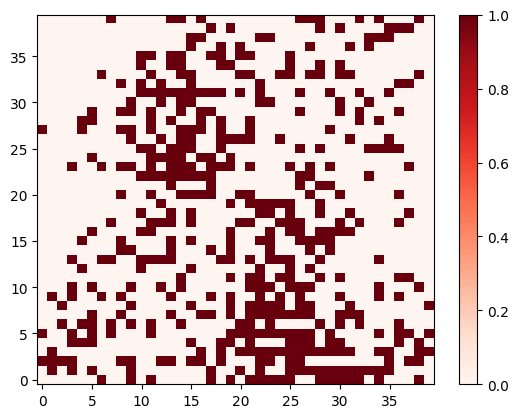

valores:0.0


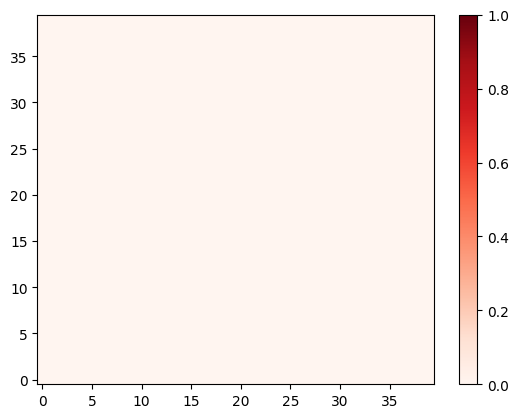

valores:113.0


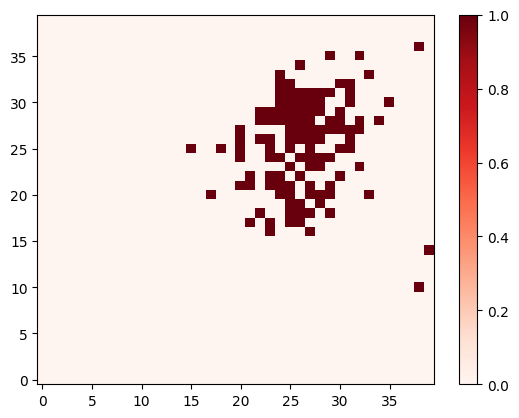

valores:1554.0


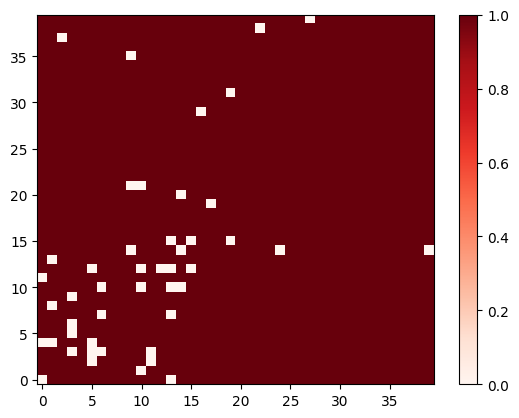

valores:286.0


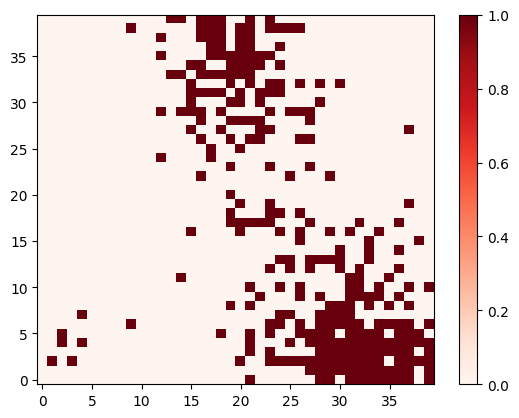

valores:40.0


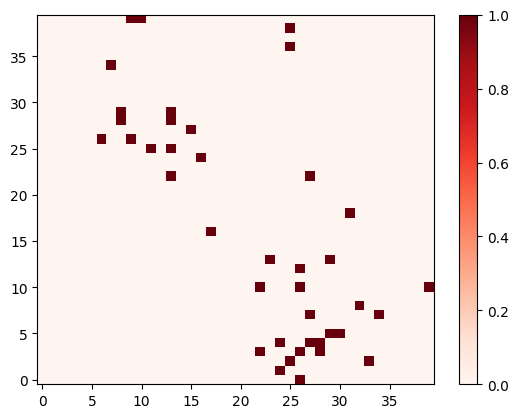

valores:376.0


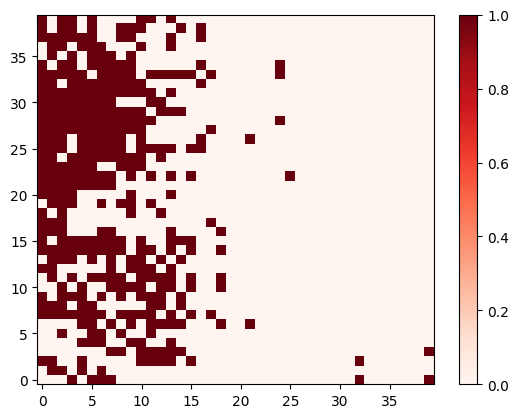

valores:0.0


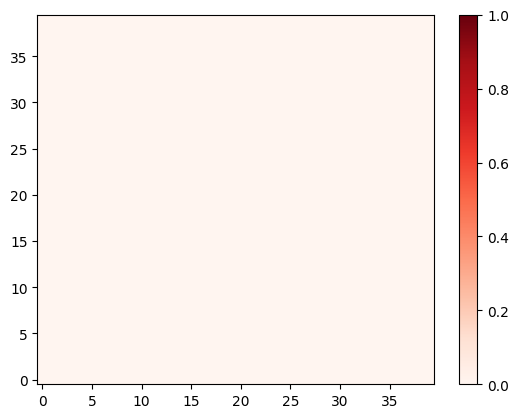

valores:23.0


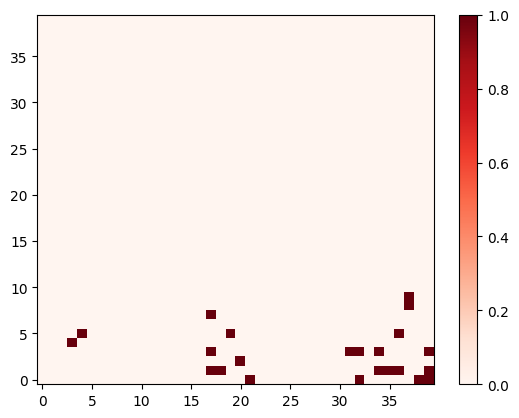

valores:0.0


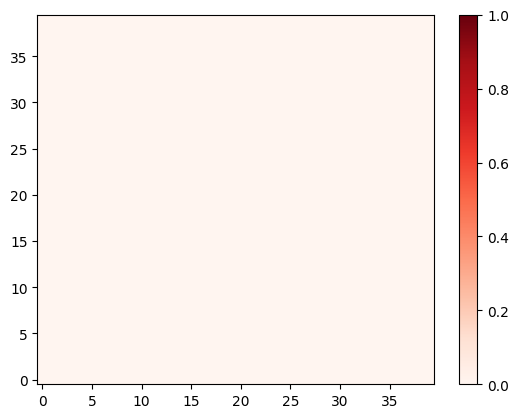

valores:0.0


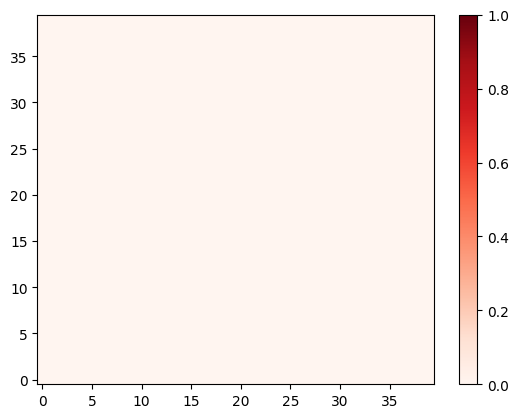

valores:5.0


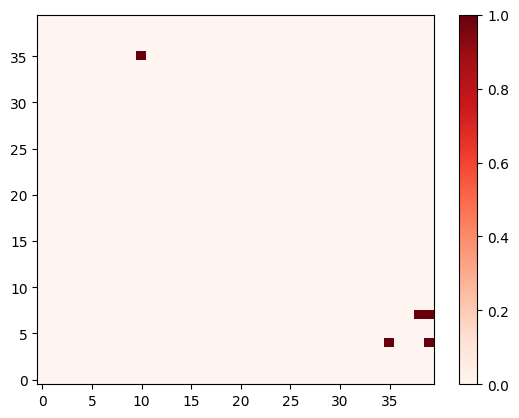

valores:703.0


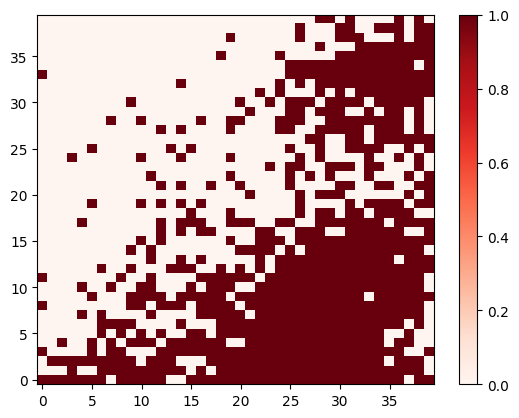

valores:0.0


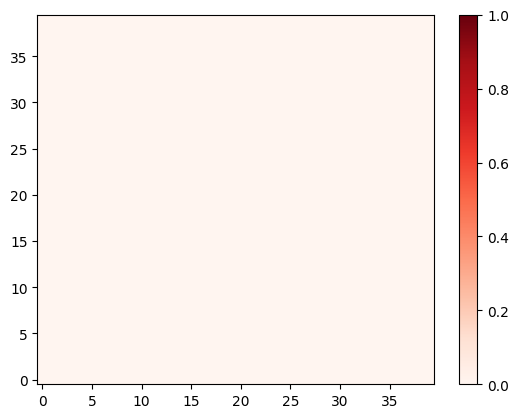

valores:19.0


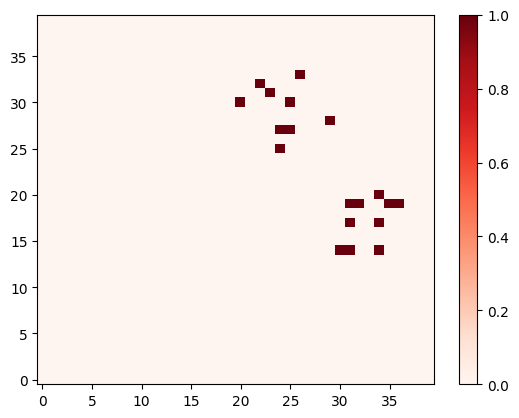

valores:824.0


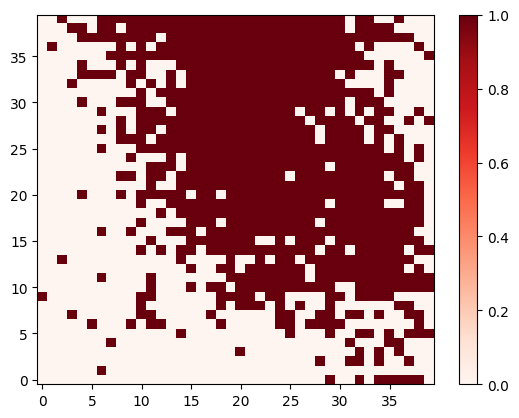

valores:818.0


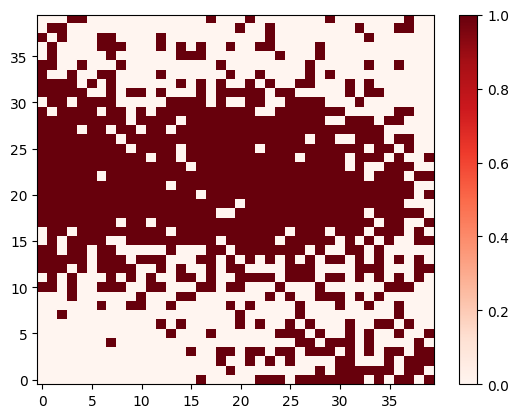

valores:51.0


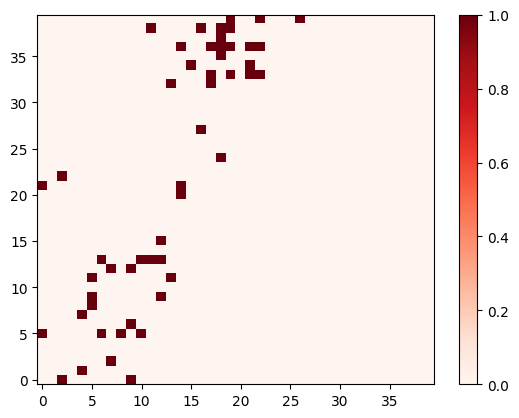

valores:0.0


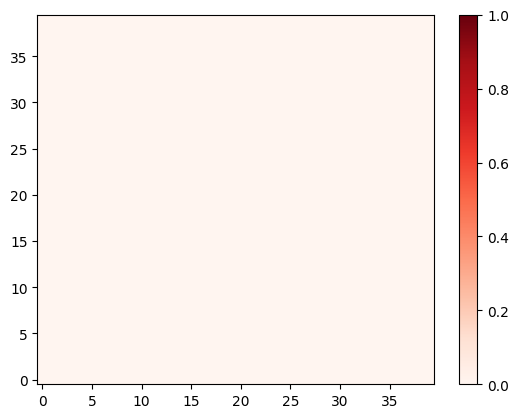

valores:0.0


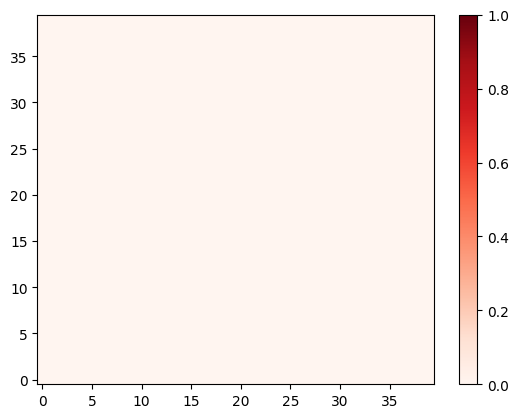

valores:0.0


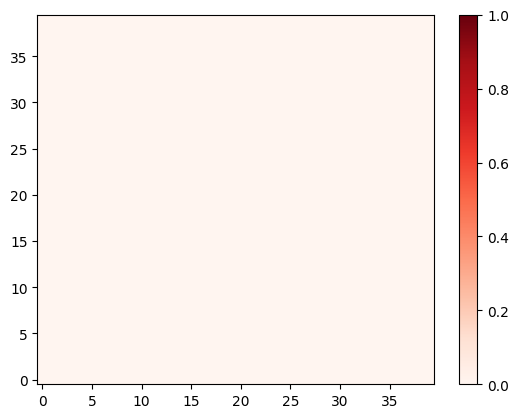

valores:573.0


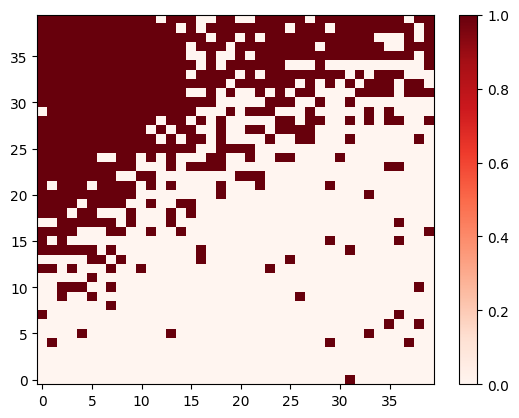

valores:9.0


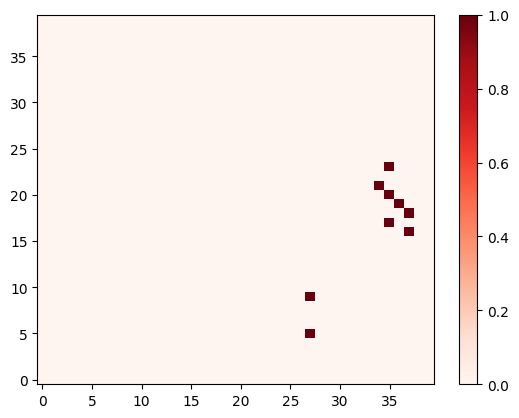

valores:0.0


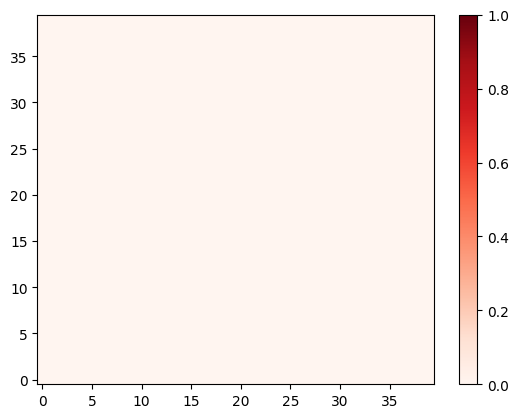

valores:5.0


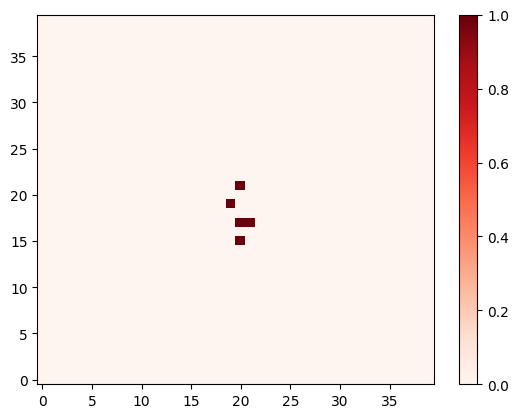

valores:251.0


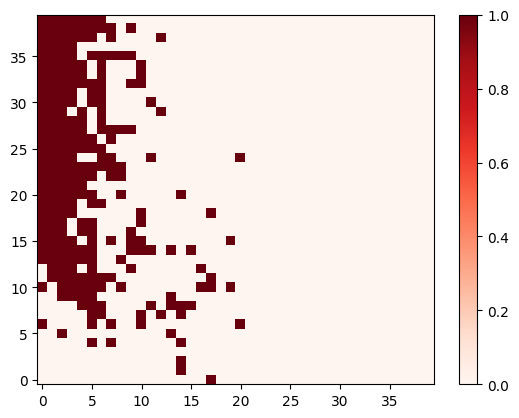

valores:163.0


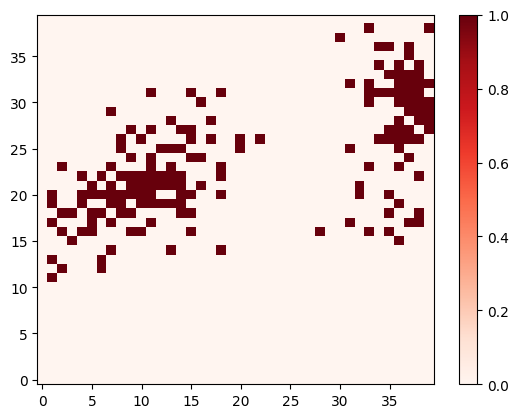

valores:8.0


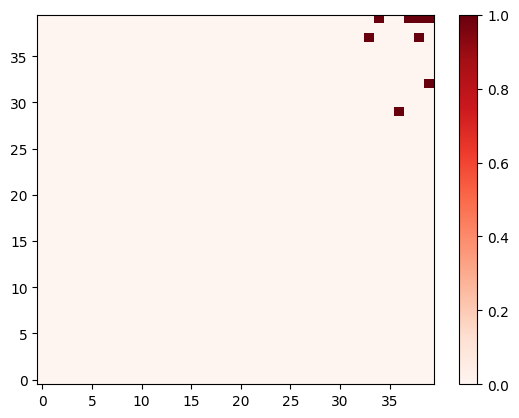

valores:52.0


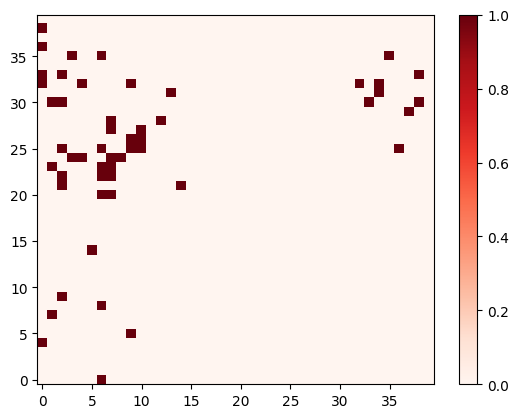

valores:334.0


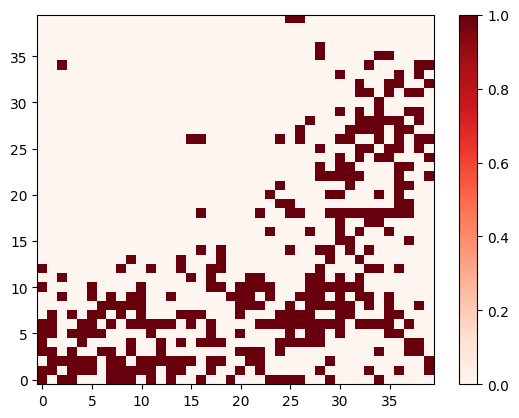

valores:0.0


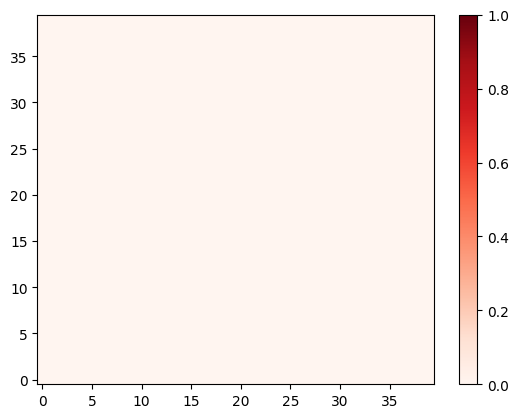

valores:0.0


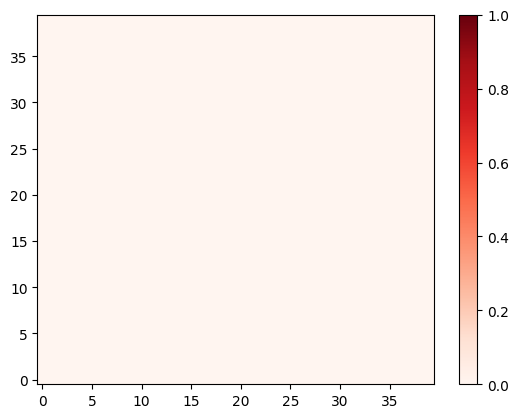

valores:0.0


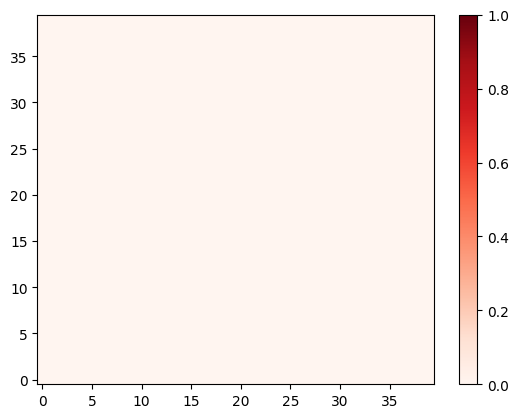

valores:0.0


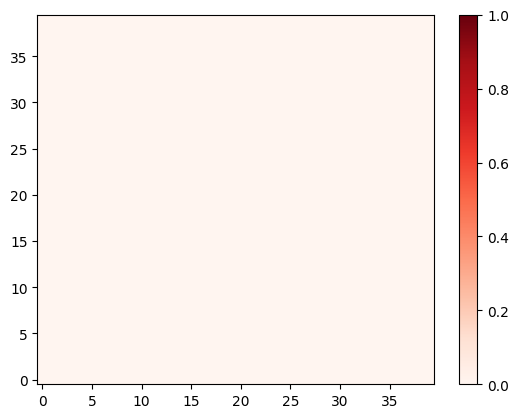

valores:0.0


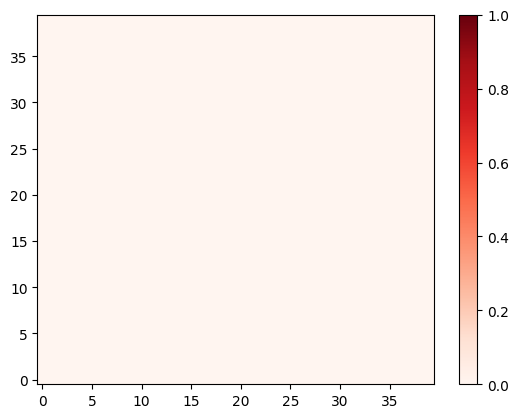

valores:0.0


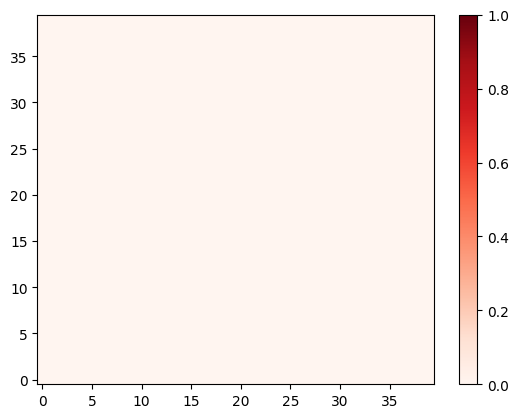

valores:352.0


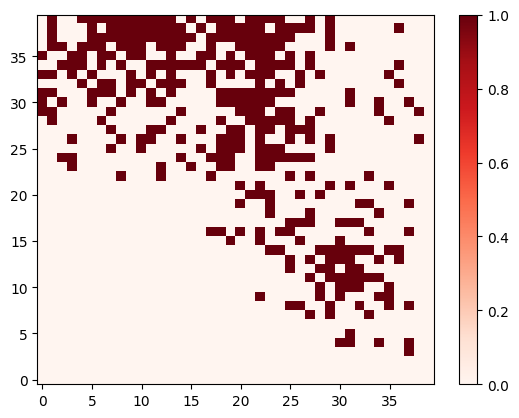

valores:0.0


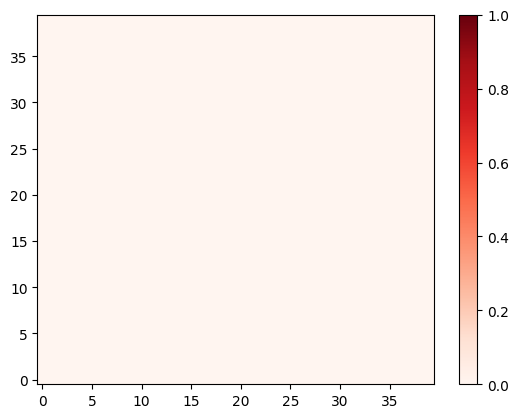

valores:16.0


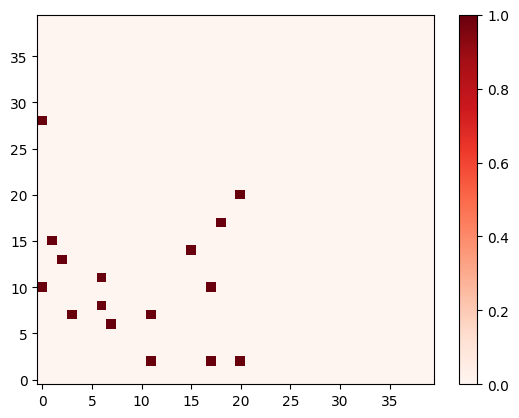

valores:0.0


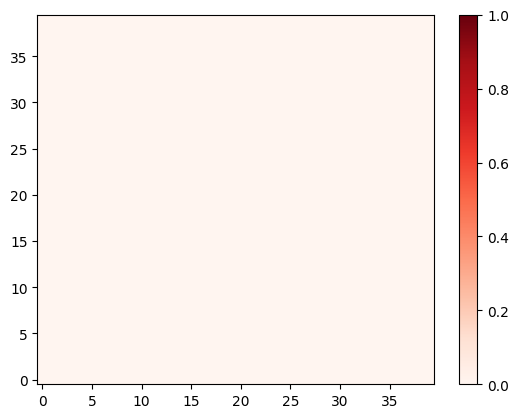

valores:947.0


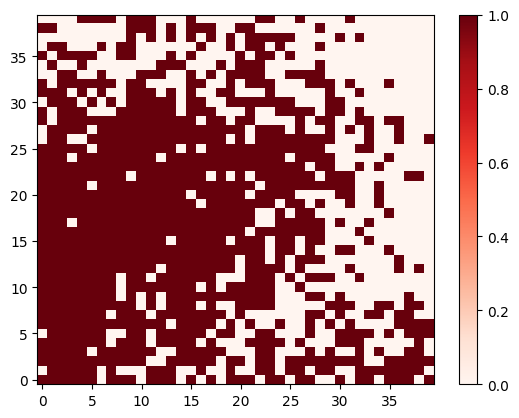

valores:1230.0


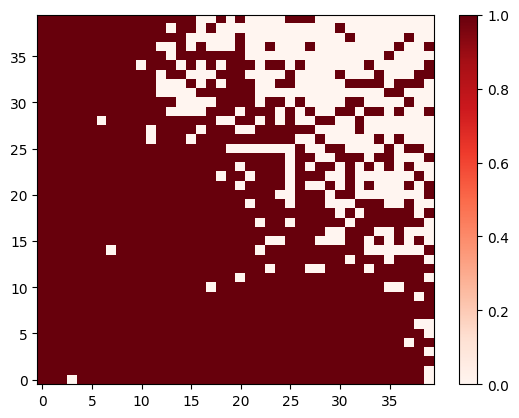

valores:7.0


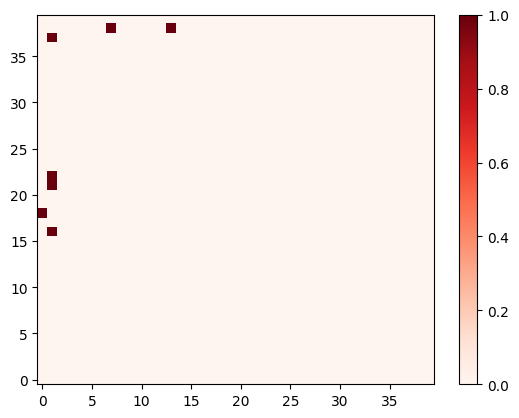

valores:0.0


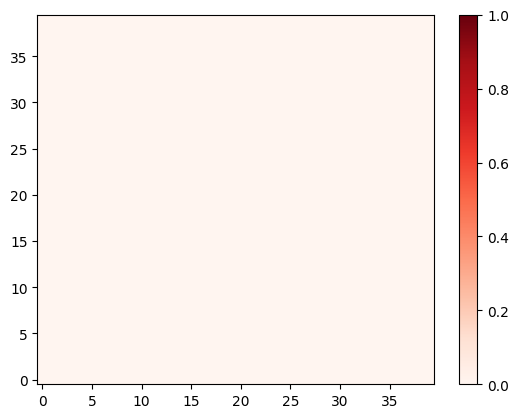

valores:295.0


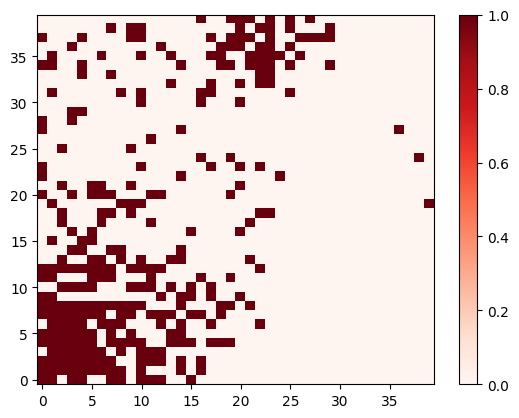

valores:380.0


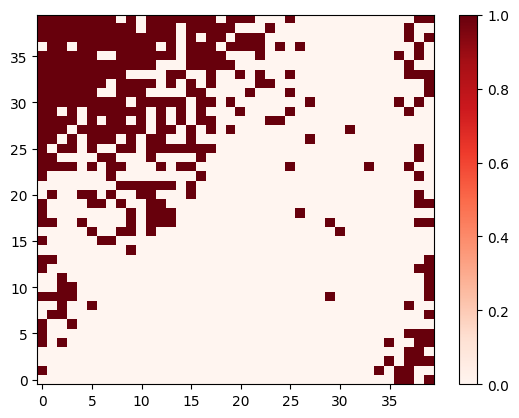

valores:13.0


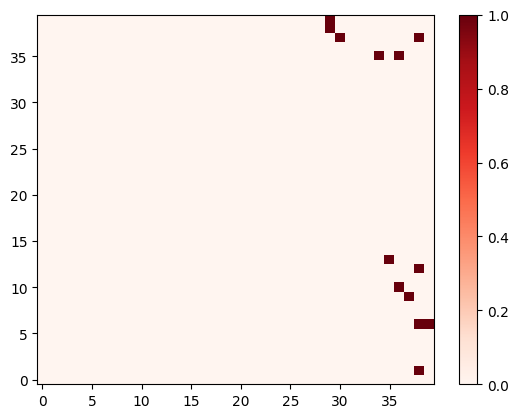

valores:0.0


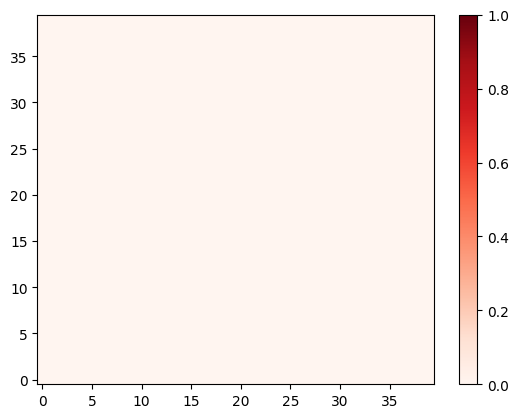

valores:504.0


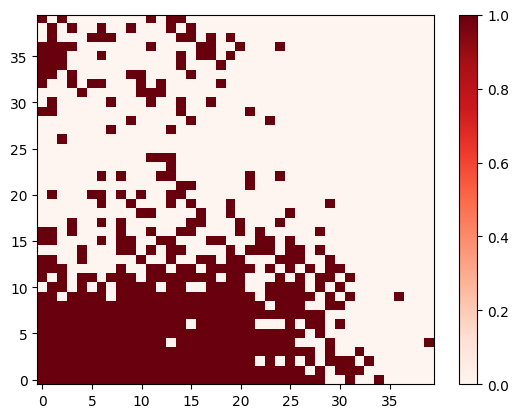

valores:32.0


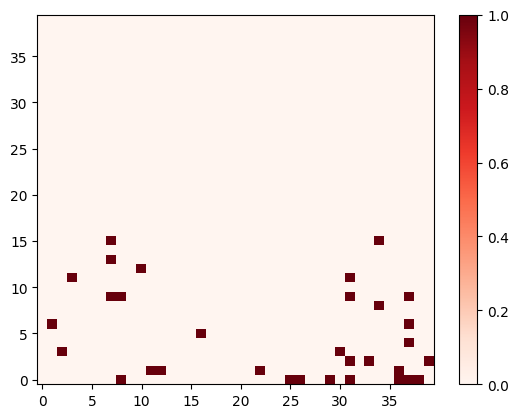

In [7]:
for i in range(len(matrices)):
    print("valores:"+str(matrices[i].sum()))
    plt.imshow(matrices[i], cmap='Reds', interpolation='nearest', origin='lower', vmin=0, vmax=1, aspect='auto')
    plt.colorbar()
    plt.show()

### Generacion de las historias

Con las imagenes se generan historias de 5(Esto puede modificarse dependiendo el caso) imagenes secuenciales las cuales serviran en algun modelo de prediccion ya que las imagenes tienen secuencia.

In [8]:
historial=[]
for i in range(len(matrices)-4):
    historial.append([matrices[i], matrices[i+1],matrices[i+2],matrices[i+3], matrices[i+4]])
np.shape(historial)

(98, 5, 40, 40)

##### Resultados del proceso

En este ejemplo se obtiene lo siguiente.

(98, 5, 40, 40)

(muestras, imagenes, renglones, columnas)

El 98 representa las secuencias que se tienen, en este caso son 98.

Cada secuencia esta compuesta por 5 imagenes, normalmente en los articulos les llaman frames.

Cada imagen es de tamaño 40x40.

##### Este conjunto de imagenes ya podria utilizarse en algunos modelos predictivos

#### Guardando resultados

In [11]:
np.save('historial_1D', historial)